# SVD on Face Images

## Part (a):

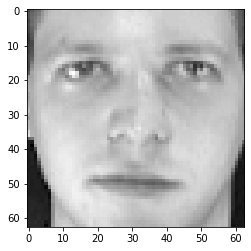

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
A_1 = faces["images"][0][:63, :63]
A_2 = faces["images"][110][:63, :63]
A_3 = faces["images"][365][:63, :63]
plt.imshow(A_1, cmap="gray");

## Part (b):

In [ ]:
# The following functions are inspired by functions online:
def blockshaped(arr, nrows, ncols):
    """
    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))


def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [ ]:
A1_patches = blockshaped(A_1, 7, 7)
A2_patches = blockshaped(A_2, 7, 7)
A3_patches = blockshaped(A_3, 7, 7)

In [ ]:
print(A1_patches.shape)
A1_patches[0] # 7×7

(81, 7, 7)


array([[0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ,
        0.607438  , 0.6570248 ],
       [0.3429752 , 0.40495867, 0.43801653, 0.47107437, 0.553719  ,
        0.62396693, 0.6694215 ],
       [0.3429752 , 0.41735536, 0.45041323, 0.5123967 , 0.57438016,
        0.6446281 , 0.677686  ],
       [0.30578512, 0.4090909 , 0.47107437, 0.5247934 , 0.59504133,
        0.6528926 , 0.6735537 ],
       [0.33471075, 0.4214876 , 0.4752066 , 0.58264464, 0.6404959 ,
        0.6652893 , 0.6652893 ],
       [0.3140496 , 0.39256197, 0.4752066 , 0.61157024, 0.6528926 ,
        0.6528926 , 0.6652893 ],
       [0.30991736, 0.37603307, 0.53305787, 0.6528926 , 0.6570248 ,
        0.6446281 , 0.6528926 ]], dtype=float32)

In [ ]:
# Flattening and Stacking:
B1 = A1_patches.flatten().reshape(81, 49)
B2 = A2_patches.flatten().reshape(81, 49)
B3 = A3_patches.flatten().reshape(81, 49)

In [ ]:
print(B1.shape)
B1

(81, 49)


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.6570248 , 0.6446281 ,
        0.6528926 ],
       [0.677686  , 0.69008267, 0.6859504 , ..., 0.6859504 , 0.6942149 ,
        0.6942149 ],
       [0.69008267, 0.6942149 , 0.69008267, ..., 0.71487606, 0.71487606,
        0.71900827],
       ...,
       [0.73140496, 0.74793386, 0.72727275, ..., 0.58677685, 0.56198347,
        0.5495868 ],
       [0.6652893 , 0.6487603 , 0.6280992 , ..., 0.6322314 , 0.6446281 ,
        0.6652893 ],
       [0.58264464, 0.59917355, 0.5206612 , ..., 0.15289256, 0.14876033,
        0.16115703]], dtype=float32)

In [ ]:
y = B1[0,:].reshape(7, 7)
x = np.array([])
x = np.append(x, y)
print(y)

[[0.30991736 0.3677686  0.41735536 0.44214877 0.5289256  0.607438
  0.6570248 ]
 [0.3429752  0.40495867 0.43801653 0.47107437 0.553719   0.62396693
  0.6694215 ]
 [0.3429752  0.41735536 0.45041323 0.5123967  0.57438016 0.6446281
  0.677686  ]
 [0.30578512 0.4090909  0.47107437 0.5247934  0.59504133 0.6528926
  0.6735537 ]
 [0.33471075 0.4214876  0.4752066  0.58264464 0.6404959  0.6652893
  0.6652893 ]
 [0.3140496  0.39256197 0.4752066  0.61157024 0.6528926  0.6528926
  0.6652893 ]
 [0.30991736 0.37603307 0.53305787 0.6528926  0.6570248  0.6446281
  0.6528926 ]]


## Hint 2:

In [ ]:
# Draft:
output = []
for i in range(B1.shape[0]):
    x = B1[i,:].reshape(7, 7)
    output.append(x)
    
output = np.array(output)
print(output.shape)
unblockshaped(output,63, 63).shape

(81, 7, 7)


(63, 63)

In [ ]:
def create_patches(arr):
    patches = blockshaped(arr, 7, 7).flatten().reshape(81, 49)
    return patches

In [ ]:
def create_face(arr):
    output = []
    for i in range(patches.shape[0]):
        x = arr[i,:].flatten().reshape(7, 7)
        output.append(x)
    output = np.array(output)
    
    reshaped_patches=unblockshaped(output, 63, 63)
    return reshaped_patches

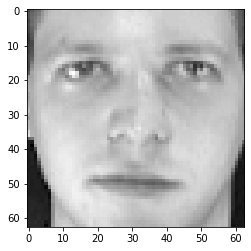

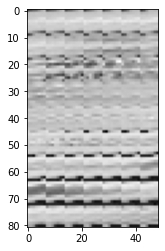

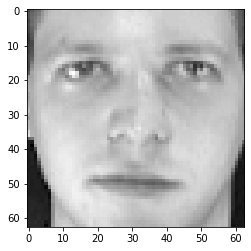

In [ ]:
plt.imshow(A_1, cmap="gray");
plt.figure()
plt.imshow(create_patches(A_1), cmap="gray");
plt.figure()
plt.imshow(create_face(create_patches(A_1)), cmap="gray");

## Part (c):

In [ ]:
# SVD on B1:
U, S, VT = np.linalg.svd(B1, full_matrices=False)
U.shape, S.shape, VT.shape

((81, 49), (49,), (49, 49))

In [ ]:
# Printing the first 10 singular values:
print(S[:10])

[41.163345    3.8393824   1.9943997   1.3196774   1.183775    0.97274166
  0.8572861   0.712525    0.6731111   0.61996824]


## Part (d):

$V_{1}$ is a matrix whose columns are the right singular vectors in the SVD decomposition of $B_1$.

The left singular vectors (erpresented by $U_{1}$) of $B_1$ are eigenvectors of $B_{1}B_{1}^T$and the right singular vectors **(represented by $V_{1}$)** of $B_1$ are eigenvectors of $B_{1}^TB_{1}$. Each singular value specifies the luminance of an image layer while the corresponding pair of
singular vectors (U and **V**) specifies the <u>geometry of the image</u>. U and **V** are unitary orthogonal matrices (the sum of squares of
each column is unity and all the columns are uncorrelated) and
S is a diagonal matrix (only the leading diagonal has non-zero
values) of decreasing singular values. 

In [ ]:
x = VT.T[:, 0:3]
x.shape

(49, 3)

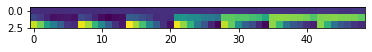

In [ ]:
# Image of the transpose of the array:
plt.imshow(VT.T[:, 0:3].T)
plt.show()

## Part (e):

In [ ]:
s = np.zeros((k, k))
np.fill_diagonal(s, S[:k])

for k in [1, 5, 10, 20]:
    print(s)
    print()
    mat_approx = U[:, :k] @ s @ VT[:k, :]
    print(mat_approx)
    

In [ ]:
# Reconstruction of the matrix using the first 1, 5, 10, and 20 singular values:

# Approximation 1:
k = 1
s = np.zeros((k, k))
np.fill_diagonal(s, S[:k])
print("Approximation 1:")
print(s)
print()

approx1 = U[:, :k] @ s @ VT[:k, :]
print(approx1)
print()


# Approximation 2:
k = 5
s = np.zeros((k, k))
np.fill_diagonal(s, S[:k])
print("Approximation 2:")
print(s)
print()

approx2 = U[:, :k] @ s @ VT[:k, :]
print(approx2)
print()


# Approximation 3:
k = 10
s = np.zeros((k, k))
np.fill_diagonal(s, S[:k])
print("Approximation 3:")
print(s)
print()

approx3 = U[:, :k] @ s @ VT[:k, :]
print(approx3)
print()

# Approximation 4:
k = 20
s = np.zeros((k, k))
np.fill_diagonal(s, S[:k])
print("Approximation 4:")
print(s)
print()

approx4 = U[:, :k] @ s @ VT[:k, :]
print(approx4)


Approximation 1:
[[41.16334534]]

[[0.52381226 0.52520819 0.52733988 ... 0.52235088 0.51585174 0.51484324]
 [0.69393484 0.69578415 0.69860817 ... 0.69199884 0.68338893 0.68205289]
 [0.71546751 0.7173742  0.72028584 ... 0.71347144 0.70459436 0.70321686]
 ...
 [0.67724554 0.67905037 0.68180647 ... 0.6753561  0.66695326 0.66564935]
 [0.59688089 0.59847155 0.6009006  ... 0.59521566 0.58780993 0.58666075]
 [0.34615997 0.34708248 0.3484912  ... 0.34519423 0.34089929 0.34023282]]

Approximation 2:
[[41.16334534  0.          0.          0.          0.        ]
 [ 0.          3.83938241  0.          0.          0.        ]
 [ 0.          0.          1.99439967  0.          0.        ]
 [ 0.          0.          0.          1.31967735  0.        ]
 [ 0.          0.          0.          0.          1.18377495]]

[[0.33831308 0.35914337 0.41554719 ... 0.64594166 0.67077092 0.68300347]
 [0.6949878  0.69469285 0.6966251  ... 0.6924151  0.69271242 0.69845896]
 [0.70097774 0.70387926 0.70960092 ... 0.

In [ ]:
approx1.shape, approx2.shape, approx3.shape, approx4.shape

((81, 49), (81, 49), (81, 49), (81, 49))

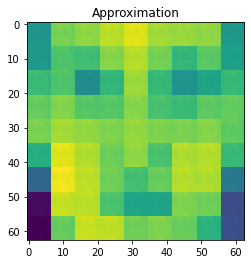

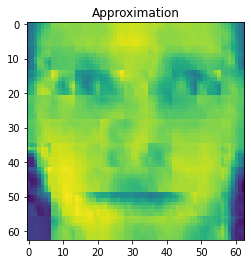

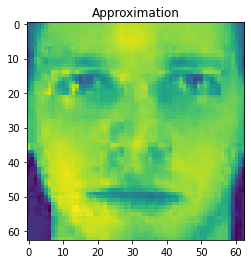

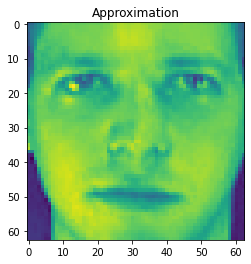

In [ ]:
for i in [approx1, approx2, approx3, approx4]:
    plt.imshow(create_face(i))
    plt.title("Approximation")
    plt.show()

## Part (g):

In general for out images, for approximations using rank k, SVD decomposes the matrix to matrices with the following sizes:
$$(81, k)*(k, k)*(k, 49)$$

- For rank k = 1, SVD decomposes the matrix to matrices with the following sizes:
$(81, 1)*(1, 1)*(1, 49)$. A total of $81 + 1 + 49 = 131$ nonzero parameters have been used. A fraction of 131/3969 has to be stored for this approximation.

- For rank k = 5, SVD decomposes the matrix to matrices with the following sizes:
$(81, 5)*(5, 5)*(5, 49)$. A total of $405 + 5 + 245 = 655$ nonzero parameters have been used. A fraction of 655/3969 has to be stored for this approximation.

- For rank k = 10, SVD decomposes the matrix to matrices with the following sizes:
$(81, 10)*(10, 10)*(10, 49)$. A total of $810 + 10 + 490 = 1310$ nonzero parameters have been used. A fraction of 1310/3969 has to be stored for this approximation.

- For rank k = 20, SVD decomposes the matrix to matrices with the following sizes:
$(81, 20)*(20, 20)*(20, 49)$. A total of $1620 + 20 + 980 = 2620$ parameters have been used. A fraction of 2620/3969 has to be stored for this approximation.


**Side Note:** The number of parameters in Diagonal Matrices has been taken to be equal to the number of singular values considered; that is, k. All other entries in U and V_T have been considered to be nonzero for ease of calculation. 

**Comments:** We are definitely saving space with the approximations above, with such an image produced with a 20-rank approximation saving up to 34% of space used to store parameters.



## Part (f):

In [ ]:
# SVD on A1:
U1, S1, VT1 = np.linalg.svd(A_1, full_matrices=False)
U1.shape, S1.shape, VT1.shape

((63, 63), (63,), (63, 63))

In [ ]:
print(VT1.T[:, 0:20].shape, "\n")
V1_20 = VT.T[:, 0:20]
print(V1_20)

(63, 20) 

[[-6.95866197e-02  2.09368974e-01  2.68282718e-03 ... -7.02758655e-02
   1.27091005e-01 -3.28754723e-01]
 [-7.36471489e-02  2.34783515e-01 -7.46341720e-02 ...  9.33572650e-02
  -1.70569837e-01  3.35310280e-01]
 [-8.76807198e-02  2.90507823e-01 -9.63703692e-02 ...  7.86800832e-02
   1.69460669e-01 -2.08169833e-01]
 ...
 [-9.16361734e-02  3.00291508e-01  2.96372604e-02 ...  1.06860414e-01
   7.51106814e-03  8.79204795e-02]
 [-8.08295831e-02  2.87140250e-01 -6.89454703e-03 ... -1.37249976e-01
  -2.12069601e-01  1.62569314e-01]
 [-7.05568120e-02  2.45613530e-01  2.06720899e-03 ... -1.11265495e-01
  -3.15514160e-04  1.75223239e-02]]


In [ ]:
# SVD on B2:
U2, S2, VT2 = np.linalg.svd(B2, full_matrices=False)
U2.shape, S2.shape, VT2.shape

((81, 49), (49,), (49, 49))

In [ ]:
# SVD on B3:
U3, S3, VT3 = np.linalg.svd(B3, full_matrices=False)
U3.shape, S3.shape, VT3.shape

((81, 49), (49,), (49, 49))

In [ ]:
Y2 = U2 @ S2
Y3 = U3 @ S3